# import the require libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Frist step load the Dataset

In [38]:
df=pd.read_excel(r"C:\Users\91767\Downloads\Copy of Rotten_Tomatoes_Movies3.xls")
df.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0


# pandas profiling is one of the library to find the information about the data using different visualizing Charts like bar chart


In [4]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# df.head() mean we can find top 5 rows
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [6]:
# df.tail() means we can find least 5 rows
df.tail()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0
16637,Zulu Dawn,"A prequel to Zulu, Zulu Dawn depicts the event...",NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,2005-09-27,117.0,Tango Entertainment,Rotten,57,7,62.0


In [7]:
# describe mean find the mean,max,min
df.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16483.000000,16638.000000,16638.000000,16386.000000
mean,102.391494,60.466522,56.607104,60.470829
std,25.028011,28.587230,66.383800,20.462368
min,1.000000,0.000000,5.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000
50%,99.000000,66.000000,28.000000,62.000000
75%,111.000000,86.000000,76.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


# second step data preprossing (Data Cleaning)

In [8]:
# fillna mean to find the Handling Missing Values
df.fillna(method='ffill', inplace=True)
df
df.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,Nicole Holofcener's newest might seem slight i...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0


# Data spliting  in this process Split the data into training and validation sets.

In [9]:
# Drop the target variable from the features DataFrame
X = df.drop('audience_rating', axis=1)
X


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140
2,10,Blake Edwards' 10 stars Dudley Moore as George...,Nicole Holofcener's newest might seem slight i...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",Lacking the punch and good cheer of The Incred...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,The brilliantly well-rounded Zootopia offers a...,NR,"Action & Adventure, Art House & International,...","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",The brilliantly well-rounded Zootopia offers a...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21


In [10]:
# Define the target variable
y = df[['audience_rating']]
y.head()


,audience_rating
0,53.0
1,64.0
2,53.0
3,97.0
4,74.0


In [11]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Split the data into two training set and testing set (80% training dataset,20%testing dataset)
X_train

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count
13450,Tank Girl,"This wild, futuristic action-fantasy is set in...","While unconventional, Tank Girl isn't particul...",R,"Action & Adventure, Comedy, Science Fiction & ...",Rachel Talalay,Tedi Sarafian,"Lori Petty, Malcolm McDowell, Ice-T, Naomi Wat...",1995-03-01,2001-04-10,104.0,MGM Home Entertainment,Rotten,38,39
1085,Emma,Based on a comic novel by 19th century author ...,Emma marks an auspicious debut for writer-dire...,PG,"Comedy, Romance",Douglas McGrath,Douglas McGrath,"Gwyneth Paltrow, Jeremy Northam, Toni Collette...",1996-08-02,2002-01-15,120.0,Miramax Films,Certified Fresh,84,50
8304,Juice,Cinematographer Ernest R. Dickerson directed a...,"Entertaining for some very young viewers, but ...",R,"Action & Adventure, Drama",Ernest R. Dickerson,"Ernest R. Dickerson, Gerard Brown","Omar Epps, Tupac Shakur, Jermaine Hopkins, Kha...",1992-01-17,2001-01-16,95.0,Paramount Home Video,Fresh,78,23
7634,I Can Do Bad All By Myself,A hard-living nightclub singer discovers the i...,"Though somewhat formulaic and predictable, Per...",PG-13,Comedy,Tyler Perry,Tyler Perry,"Tyler Perry, Taraji P. Henson, Adam Rodriguez,...",2009-09-11,2005-06-28,113.0,Lionsgate Films,Fresh,61,44
1924,3 Ninjas Kick Back,"The sequel to the 1992 Disney film ""3 Ninjas,""...",3 Ninjas might be exciting enough for younger ...,PG,"Action & Adventure, Comedy, Kids & Family",Charles T. Kanganis,Mark Saltzman,"Victor Wong, Max Elliott Slade, Sean Fox, J. E...",1994-05-06,2001-08-07,99.0,Sony Pictures Home Entertainment,Rotten,15,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Poltergeist,"Legendary filmmaker Sam Raimi (""Spiderman,"" ""E...",Paying competent homage without adding anythin...,PG-13,Horror,Gil Kenan,"Steven Spielberg, David Lindsay-Abaire","Sam Rockwell, Rosemarie DeWitt, Kyle Catlett, ...",2015-05-22,2015-09-29,93.0,20th Century Fox,Rotten,31,129
11964,Romantics Anonymous,Romantics Anonymous tells the story of Ang√©li...,An engrossing documentary look at ordinary liv...,NR,"Art House & International, Comedy, Romance",Jean-Pierre Am√©ris,"Jean-Pierre Am√©ris, Philippe Blasband","Beno√Æt Poelvoorde, Isabelle Carr√©, Lise Lam√...",2011-11-25,2012-03-27,80.0,Tribecca Films,Fresh,86,35
5390,Dovlatov,The story circles around life of an outstandin...,Dough's 1st Movie is a long snooze-fest that s...,NR,"Art House & International, Drama",Alexey German,"Aleksei German, Yulia Tupikina","Milan Maric, Danila Kozlovsky, Helena Sujecka,...",2018-10-26,2018-10-26,126.0,Netflix,Fresh,79,14
860,Teacher's Pet,"Hard-boiled, self-educated newspaper editor Cl...","Cruel, dark, but undeniably effective, Diaboli...",NR,"Classics, Comedy, Drama, Romance",George Seaton,"Fay Kanin, Michael Kanin","Clark Gable, Doris Day, Gig Young, Mamie Van D...",1958-04-01,2005-04-19,120.0,Paramount Home Video,Fresh,83,6


In [13]:
X_val

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count
4013,Cake,"The acerbic, hilarious Claire Simmons becomes ...",Cake finds Jennifer Aniston making the most of...,R,Drama,Daniel Barnz,Patrick Tobin,"Jennifer Aniston, Anna Kendrick, Adriana Barra...",2015-01-23,2015-04-21,98.0,Cinelou Films,Rotten,48,126
6119,Firefox,Producer/director/star Clint Eastwood takes hi...,Though not as raunchy or juvenile as the avera...,PG,"Action & Adventure, Drama, Science Fiction & F...",Clint Eastwood,"Alex Lasker, Wendell Wellman","Clint Eastwood, Freddie Jones, Warren Clarke, ...",1982-06-01,2002-10-01,136.0,Warner Bros. Pictures,Rotten,38,13
12585,Sing,A koala impresario stages a grand singing comp...,"Sing delivers colorfully animated, cheerfully ...",PG,"Animation, Comedy, Musical & Performing Arts","Garth Jennings, Christophe Lourdelet",Garth Jennings,"Matthew McConaughey, Reese Witherspoon, Seth M...",2016-12-21,2017-03-21,108.0,Illumination Entertainment,Fresh,72,180
4395,Citizenfour,"In January 2013, Poitras (recipient of the 201...","Part real-life thriller, part sobering examina...",R,Documentary,Laura Poitras,Chris Gerolmo,"Glenn Greenwald, Bill Binney, Jacob Appelbaum,...",2014-10-21,2015-08-25,114.0,Radius-TWC,Certified Fresh,96,145
9070,Live Die Repeat: Edge of Tomorrow,"The epic action of ""Edge of Tomorrow"" unfolds ...","Gripping, well-acted, funny, and clever, Edge ...",PG-13,"Drama, Science Fiction & Fantasy",Doug Liman,"Dante Harper, Joby Harold, Christopher McQuarr...","Tom Cruise, Emily Blunt, Bill Paxton, Jonas Ar...",2014-06-06,2014-10-07,113.0,Warner Bros. Pictures,Certified Fresh,90,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,Craigslist Joe,In a time when America's economy and sense of ...,The Craft's campy magic often overrides the fe...,NR,"Action & Adventure, Documentary, Special Interest",Joseph Garner,"Andrew Fleming, Peter Filardi","Joseph Garner, David Garner, Michael Garner, A...",2012-08-02,2012-10-29,90.0,Independent Pictures,Rotten,20,5
12702,Smiley Face,"Jane F, an unsuccessful slacker actress, is ha...",Although many of the jokes have been done befo...,R,Comedy,Gregg Araki,Dylan Haggerty (II),"Anna Faris, Danny Masterson, Roscoe Lee Browne...",2007-11-16,2008-01-08,84.0,First Look Media,Fresh,66,35
1043,Restoration,This lavish historical drama based on the accl...,Restoration spins an engaging period yarn out ...,R,"Drama, Romance",Michael Hoffman,Rupert Walters,"Robert Downey Jr., Sam Neill, David Thewlis, P...",1996-02-02,1999-08-03,150.0,Miramax,Fresh,70,33
8176,Jesus Camp,The youngest foot soldiers for the Lord are sh...,Evangelical indoctrination is given an unflinc...,PG-13,"Documentary, Musical & Performing Arts, Faith ...","Heidi Ewing, Rachel Grady",Fernando Guzzoni,"Pastor Becky Fischer, Levi, Mike Papantonio, R...",2006-09-15,2007-01-23,86.0,Magnolia Pictures,Certified Fresh,87,103


In [14]:
y_train

,audience_rating
13450,63.0
1085,77.0
8304,90.0
7634,81.0
1924,40.0
...,...
11284,22.0
11964,73.0
5390,59.0
860,70.0


In [15]:
y_val

,audience_rating
4013,44.0
6119,41.0
12585,72.0
4395,87.0
9070,90.0
...,...
4688,64.0
12702,44.0
1043,59.0
8176,80.0


In [16]:
df

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,Nicole Holofcener's newest might seem slight i...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",Lacking the punch and good cheer of The Incred...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,The brilliantly well-rounded Zootopia offers a...,NR,"Action & Adventure, Art House & International,...","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",The brilliantly well-rounded Zootopia offers a...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0


# buliding the model pipeline 

In [17]:
# Use ColumnTransformer to apply different preprocessing steps to numerical and categorical features.
numerical_features = ['runtime_in_minutes']
categorical_features = ['genre','directors']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [18]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['runtime_in_minutes']),
                                ('cat', OneHotEncoder(),
                                 ['genre', 'directors'])])

In [19]:
# create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100))
])


In [20]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['runtime_in_minutes']),
                                                 ('cat', OneHotEncoder(),
                                                  ['genre', 'directors'])])),
                ('model', RandomForestRegressor())])

# next step is Model Training 

In [21]:
y_train.columns

Index(['audience_rating'], dtype='object')

In [22]:
X_train

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count
13450,Tank Girl,"This wild, futuristic action-fantasy is set in...","While unconventional, Tank Girl isn't particul...",R,"Action & Adventure, Comedy, Science Fiction & ...",Rachel Talalay,Tedi Sarafian,"Lori Petty, Malcolm McDowell, Ice-T, Naomi Wat...",1995-03-01,2001-04-10,104.0,MGM Home Entertainment,Rotten,38,39
1085,Emma,Based on a comic novel by 19th century author ...,Emma marks an auspicious debut for writer-dire...,PG,"Comedy, Romance",Douglas McGrath,Douglas McGrath,"Gwyneth Paltrow, Jeremy Northam, Toni Collette...",1996-08-02,2002-01-15,120.0,Miramax Films,Certified Fresh,84,50
8304,Juice,Cinematographer Ernest R. Dickerson directed a...,"Entertaining for some very young viewers, but ...",R,"Action & Adventure, Drama",Ernest R. Dickerson,"Ernest R. Dickerson, Gerard Brown","Omar Epps, Tupac Shakur, Jermaine Hopkins, Kha...",1992-01-17,2001-01-16,95.0,Paramount Home Video,Fresh,78,23
7634,I Can Do Bad All By Myself,A hard-living nightclub singer discovers the i...,"Though somewhat formulaic and predictable, Per...",PG-13,Comedy,Tyler Perry,Tyler Perry,"Tyler Perry, Taraji P. Henson, Adam Rodriguez,...",2009-09-11,2005-06-28,113.0,Lionsgate Films,Fresh,61,44
1924,3 Ninjas Kick Back,"The sequel to the 1992 Disney film ""3 Ninjas,""...",3 Ninjas might be exciting enough for younger ...,PG,"Action & Adventure, Comedy, Kids & Family",Charles T. Kanganis,Mark Saltzman,"Victor Wong, Max Elliott Slade, Sean Fox, J. E...",1994-05-06,2001-08-07,99.0,Sony Pictures Home Entertainment,Rotten,15,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Poltergeist,"Legendary filmmaker Sam Raimi (""Spiderman,"" ""E...",Paying competent homage without adding anythin...,PG-13,Horror,Gil Kenan,"Steven Spielberg, David Lindsay-Abaire","Sam Rockwell, Rosemarie DeWitt, Kyle Catlett, ...",2015-05-22,2015-09-29,93.0,20th Century Fox,Rotten,31,129
11964,Romantics Anonymous,Romantics Anonymous tells the story of Ang√©li...,An engrossing documentary look at ordinary liv...,NR,"Art House & International, Comedy, Romance",Jean-Pierre Am√©ris,"Jean-Pierre Am√©ris, Philippe Blasband","Beno√Æt Poelvoorde, Isabelle Carr√©, Lise Lam√...",2011-11-25,2012-03-27,80.0,Tribecca Films,Fresh,86,35
5390,Dovlatov,The story circles around life of an outstandin...,Dough's 1st Movie is a long snooze-fest that s...,NR,"Art House & International, Drama",Alexey German,"Aleksei German, Yulia Tupikina","Milan Maric, Danila Kozlovsky, Helena Sujecka,...",2018-10-26,2018-10-26,126.0,Netflix,Fresh,79,14
860,Teacher's Pet,"Hard-boiled, self-educated newspaper editor Cl...","Cruel, dark, but undeniably effective, Diaboli...",NR,"Classics, Comedy, Drama, Romance",George Seaton,"Fay Kanin, Michael Kanin","Clark Gable, Doris Day, Gig Young, Mamie Van D...",1958-04-01,2005-04-19,120.0,Paramount Home Video,Fresh,83,6


In [23]:
pipeline.fit(X_train, y_train)

C:\Users\91767\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['runtime_in_minutes']),
                                                 ('cat', OneHotEncoder(),
                                                  ['genre', 'directors'])])),
                ('model', RandomForestRegressor())])

In [30]:
X_train.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count'],
      dtype='object')

In [31]:
y_pred = pipeline.predict(X_train)

In [32]:
y_pred

array([61.58, 70.45, 77.54, ..., 67.09, 73.05, 44.61])

In [33]:
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 51.23829132006357
R^2 Score: 0.8777432173825664


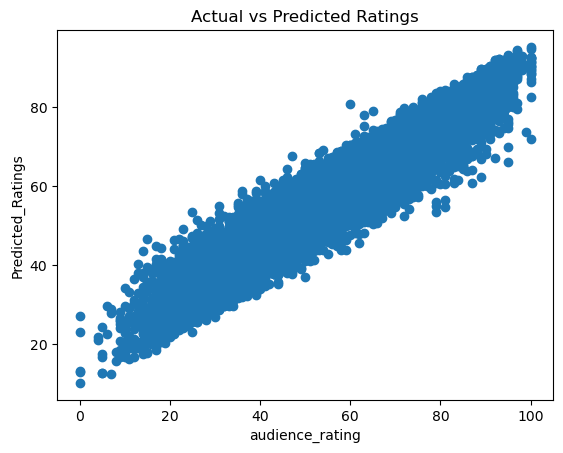

In [37]:
%matplotlib inline
plt.scatter(y_train, y_pred)
plt.xlabel('audience_rating')
plt.ylabel('Predicted_Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()